**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
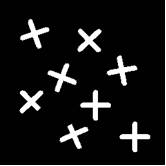
art8lab1.png: 
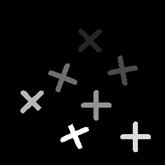
art8lab2.png: 
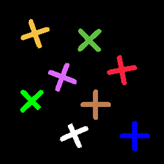
		

Tamanho da imagem :  (256, 256)


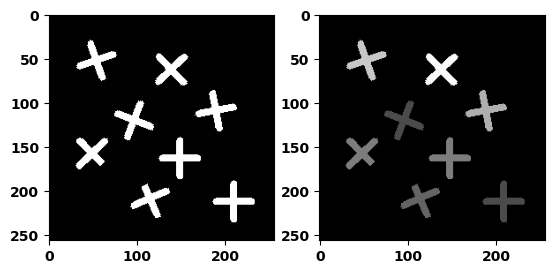

In [167]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

linhas = img.shape[0]
colunas = img.shape[1]

print('Tamanho da imagem : ', img.shape)

nova_imagem = np.zeros((linhas, colunas), dtype=int)

def dfs(imagem, x, y, visitado=None):
    #A função parte de um pixel branco (x, y) e vai recursivamente 
    #expandindo para todos os brancos conectados (8 direções), 
    #guardando-os no conjunto visitado (para não repetir).

    if visitado is None:
        visitado = set()

    if not (0 <= x < linhas and 0 <= y < colunas): #checa borda
        return visitado
    if (x, y) in visitado or imagem[x][y] != 255: #checa já visitado / não é branco
        return visitado

    visitado.add((x, y))

    vizinhos = [(x+1, y), (x-1, y), (x, y+1), (x, y-1), (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)] #conectividade-8: 4 vizinhos ortogonais + 4 diagonais
    for vx, vy in vizinhos:
        if 0 <= vx < linhas and 0 <= vy < colunas: #checa borda do vizinho 
            if (vx, vy) not in visitado and imagem[vx][vy] == 255: #checa não visitado / se é pixel branco
                dfs(imagem, vx, vy, visitado)

    return visitado  # (fora do for)

def pinta(out_img, visitado, cor=None):
    #Recebe o conjunto de pixels da componente e preenche a 
    #saída com um tom de cinza escolhido (aleatório, dentre 
    #alguns valores altos para aparecer bem).
    if cor is None:
        cores = [250, 225, 200, 175, 150, 125, 100, 75]
        cor = random.choice(cores)
    for x, y in visitado:
        out_img[x, y] = cor

#Percorre a imagem inteira; sempre que encontra um pixel branco 
#ainda não visitado, roda dfs para pegar toda a componente a partir 
#dali, acumula essa componente e marca seus pixels no visitado_global.
visitado_global = set()
componentes = []

for i in range(linhas):
    for j in range(colunas):
        if img[i][j] == 255 and (i, j) not in visitado_global:
            comp = dfs(img, i, j)  # cada chamada gera seu próprio conjunto
            if comp:
                componentes.append(comp)
                visitado_global.update(comp)

# Pinta cada componente e mostra a imagem final à direita.
for comp in componentes:
    pinta(nova_imagem, comp, cor=None)

plt.subplot(1, 2, 2)
plt.imshow(nova_imagem, cmap='gray', vmin=0, vmax=255)
plt.show()


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [168]:
# code here

3. Calcule a distância média entre os objetos da imagem anterior. Mostre um histograma com as distâncias e o valor médio.

In [169]:
# code here

4. Mostra a Transformada Distância da imagem do exercício 1